### Q1. What is hypothesis testing in statistics?

Hypothesis testing is a formal procedure to use sample data to evaluate competing claims (hypotheses) about a population parameter. We set up a **null hypothesis (H₀)** representing the status quo or no effect and an **alternative hypothesis (H₁/Ha)** representing a difference or effect, choose a test statistic, compute a p-value, and decide whether the observed evidence is strong enough to reject H₀ at a pre-chosen significance level (α).


### Q2. What is the null hypothesis, and how does it differ from the alternative hypothesis?

- **Null hypothesis (H₀):** The default claim (e.g., μ = μ₀; 'no difference,' 'no effect').
- **Alternative hypothesis (H₁/Ha):** The rival claim we want to find evidence for (e.g., μ ≠ μ₀, μ > μ₀, or μ < μ₀).

They differ in direction and purpose: H₀ is tested for possible rejection; Ha is supported only if sample evidence makes H₀ unlikely at the chosen α.


### Q3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

The **significance level (α)** is the probability threshold for rejecting H₀ when H₀ is actually true (Type I error rate). If the **p-value ≤ α**, we reject H₀; if **p-value > α**, we fail to reject H₀. Common choices are 0.10, 0.05, and 0.01—the smaller α is, the stronger the evidence required to reject H₀.


### Q4. What are Type I and Type II errors? Give examples of each.

- **Type I error (false positive):** Rejecting a true H₀.
  *Example:* Concluding a new drug works when it doesn’t.
- **Type II error (false negative):** Failing to reject a false H₀.
  *Example:* Concluding a new drug doesn’t work when it actually does.

Power (1 − β) is the probability of correctly rejecting a false H₀; it increases with larger samples, larger effects, lower variability, and (for fixed n) higher α.


### Q5. What is the difference between a Z-test and a T-test? Explain when to use each.

- **Z-test:** Use when the population standard deviation (σ) is **known** (or n is very large and σ is well-approximated), and the sampling distribution of the mean is normal (by CLT for large n).
- **T-test:** Use when σ is **unknown** and estimated by the sample standard deviation, leading to a t distribution with (n−1) degrees of freedom. For moderate/small samples from (approximately) normal populations, the t-test is appropriate.


### Q6. Binomial distribution histogram

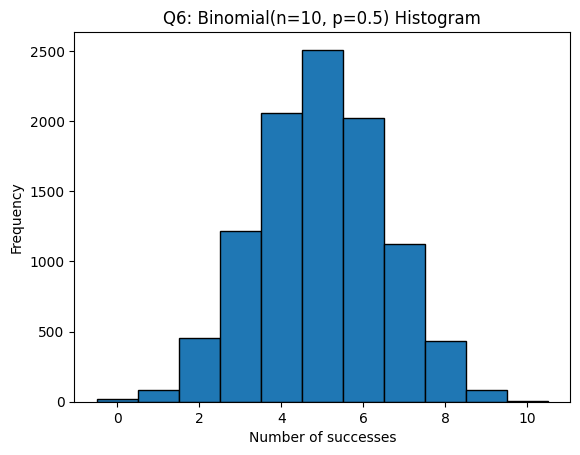

Sample mean: 4.9684
Sample variance: 2.46720144


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_trials = 10000
n = 10
p = 0.5
samples = np.random.binomial(n=n, p=p, size=n_trials)

plt.hist(samples, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black')
plt.title("Q6: Binomial(n=10, p=0.5) Histogram")
plt.xlabel("Number of successes")
plt.ylabel("Frequency")
plt.show()

print("Sample mean:", samples.mean())
print("Sample variance:", samples.var(ddof=0))

### Q7. Hypothesis testing using Z-statistics

In [4]:
import numpy as np
from math import sqrt, erfc

sample_data = [
    49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
    50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
    50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
    50.3, 50.4, 50.0, 49.7, 50.5, 49.9
]
x = np.array(sample_data, dtype=float)
n_x = x.size
xbar = x.mean()

sigma = 1.0  # assumed known population standard deviation
mu0 = 50.0
z_stat = (xbar - mu0) / (sigma / sqrt(n_x))

p_value = erfc(abs(z_stat) / sqrt(2))

print("n =", n_x, " sample mean =", round(xbar,3))
print("Z statistic =", round(z_stat,3))
print("Two-sided p-value =", round(p_value,4))

alpha = 0.05
if p_value < alpha:
    print("Reject H0 at alpha =", alpha)
else:
    print("Fail to reject H0 at alpha =", alpha)

n = 36  sample mean = 50.089
Z statistic = 0.533
Two-sided p-value = 0.5938
Fail to reject H0 at alpha = 0.05


### Q8. Simulate normal data and compute 95% CI for mean

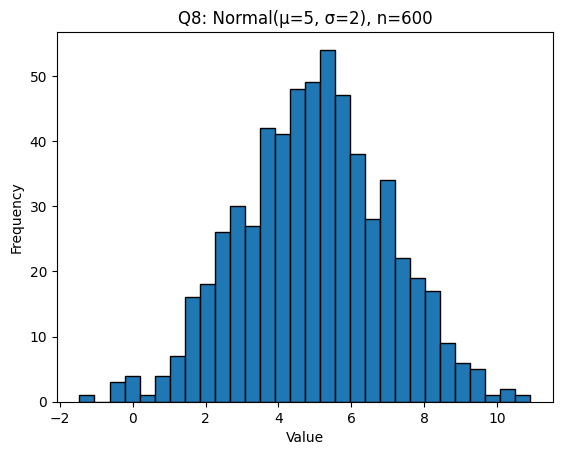

Sample mean = 4.972
Sample std = 2.007
95% CI for mean: (np.float64(4.811), np.float64(5.132))


In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
true_mu = 5.0
true_sigma = 2.0
m = 600
norm_samples = np.random.normal(loc=true_mu, scale=true_sigma, size=m)

xbar_norm = norm_samples.mean()
s_norm = norm_samples.std(ddof=1)
z_crit = 1.96
ci_low = xbar_norm - z_crit * s_norm / np.sqrt(m)
ci_high = xbar_norm + z_crit * s_norm / np.sqrt(m)

plt.hist(norm_samples, bins=30, edgecolor='black')
plt.title("Q8: Normal(μ=5, σ=2), n=600")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

print("Sample mean =", round(xbar_norm,3))
print("Sample std =", round(s_norm,3))
print("95% CI for mean:", (round(ci_low,3), round(ci_high,3)))

### Q9. Function to calculate Z-scores and plot

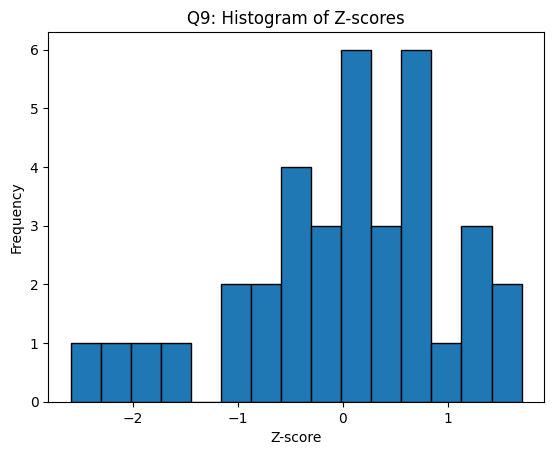

Original mean = 50.089
Sample std = 0.537
First 10 Z-scores: [-1.843  0.207  1.698 -2.589  0.766 -0.538  0.393  1.139  0.207 -0.911]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def z_scores(data, ddof=1):
    a = np.asarray(data, dtype=float)
    m = a.mean()
    s = a.std(ddof=ddof)
    return (a - m) / s, m, s

zs, m_x, s_x = z_scores(x, ddof=1)

plt.hist(zs, bins=15, edgecolor='black')
plt.title("Q9: Histogram of Z-scores")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()

print("Original mean =", round(m_x,3))
print("Sample std =", round(s_x,3))
print("First 10 Z-scores:", np.round(zs[:10], 3))